<a href="https://colab.research.google.com/github/MariaVlasenkova/repo-PNM/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2211_02_%D0%9F%D0%91%D0%94_%22STUDENT22_DB_%D0%9D%D0%98%D0%A02021_MapReduce_3_ipynb%22%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Работа с данными студента**

In [1]:
!rm 10.txt

rm: cannot remove '10.txt': No such file or directory


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 10.txt to 10.txt


In [3]:
#объединение  лекций преподавателя в один массив данных

first = True
with open('stud.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(10, 11)])
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')

filename = 'stud.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
print(text1)

#убираем гиперсылки 
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Импорт библиотек

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict


#Lowering the case, removing punctuations and numbers
#removing punctuations
text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
table=str.maketrans('','',string.punctuation) 
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)


text_lower2=text_lower.split(' ')
text_lower2
#len(text_lower2)


#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in text_lower2 if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']

for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

Выходные данные были обрезаны до нескольких последних строк (5000).
Это превосходно сказано; только бы вместо «разделения труда» следовало сказать «капитализм» и даже ещё у&#769;же: русский капитализм. Прогрессивное значение капитализма состоит именно в том, что он разрушил прежние узкие условия жизни человека, порождавшие умственную тупость и не дававшие возможности производителям самим взять в руки свою судьбу. Громадное развитие торговых сношений и мирового обмена, постоянные передвижения громадных масс населения разорвали исконные узы рода, семьи, территориальной общины и создали то разнообразие развития, «разнообразие талантов, богатство общественных отношений»[283 - K. Marx. «Der achtzehnte Brumaire», s. 98 u. s. w. (К. Маркс. «Восемнадцатое брюмера», стр. 98 и сл. Ред.)[399 - См. К. Маркс и Ф. Энгельс. Сочинения, 2 изд., т. 8, стр. 207.].], которое играет такую крупную роль в новейшей истории Запада. В России этот процесс сказался с полной силой в пореформенную эпоху, когда стар

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Making lists of the seperate data

Mapping words from first 5000 lines using mapper 1 in list 1

In [4]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [5]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [6]:
print(list1)

[('приятного', 1), ('чтения', 1), ('алексей', 1), ('толстой', 1), ('собрание', 1), ('сочинений', 1), ('десяти', 1), ('томах', 1), ('том', 1), ('стихотворения', 1), ('солнечные', 1), ('песни', 1), ('весенний', 1), ('дождь', 1), ('сквозь', 1), ('солнце', 1), ('крупный', 1), ('теплый', 1), ('траве', 1), ('синей', 1), ('реке', 1), ('круги', 1), ('пузырики', 1), ('бегут', 1), ('ней', 1), ('тростник', 1), ('торчат', 1), ('початки', 1), ('них', 1), ('накрепко', 1), ('стрекозы', 1), ('вцепились', 1), ('спрятались', 1), ('поджали', 1), ('лапки', 1), ('дождик', 1), ('поливает', 1), ('дождик', 1), ('пуще', 1), ('зеленой', 1), ('пуще', 1), ('чигирики', 1), ('реке', 1), ('пузырики', 1), ('низенько', 1), ('мокренько', 1), ('ладога', 1), ('ладога', 1), ('ладога', 1), ('ладога', 1), ('припеве', 1), ('народных', 1), ('песен', 1), ('ладо', 1), ('люли', 1), ('мое', 1), ('проч', 1), ('ладо', 1), ('муж', 1), ('супруг', 1), ('однокоренные', 1), ('слова', 1), ('лад', 1), ('согласие', 1), ('мир', 1), ('любовь

In [7]:
print(list2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Merging the two lists

In [8]:
final_list = list1+list2

# Sorting 

Sorting the list alphabetically in ascending order

In [9]:
final_list.sort()

In [10]:
len(final_list)

421821

In [11]:
final_list[0]

('', 1)

In [12]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [13]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']

for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [14]:
len(map1)

421776

In [15]:
len(map2)

44

In [16]:
print(map1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
print(map2)

[('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('i', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('ii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iii', 1), ('iv', 1), ('ix', 1), ('sic', 1), ('sic', 1)]


# Reducer

Defining the reducer function

In [18]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [19]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [20]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [21]:
list3 = reduce1(map1)

Reducing the second n-z list

In [22]:
list4 = reduce2(map2)

Merging the two reduced lists

In [23]:
answer_list = list3 + list4
print(answer_list)

[('а', 16), ('аахенский', 1), ('аахенского', 1), ('абакумов', 2), ('абакумова', 1), ('абакумову', 1), ('абамелек', 4), ('аббат', 2), ('аббата', 6), ('аббатство', 1), ('абидосской', 1), ('аблесимова', 1), ('абрам', 1), ('абраме', 1), ('абрамович', 1), ('абрамово', 8), ('абсолютизм', 8), ('абсолютизма', 7), ('абсолютизмом', 5), ('абсолютизму', 1), ('абсолютно', 20), ('абсолютного', 5), ('абсолютной', 3), ('абсолютном', 3), ('абсолютную', 1), ('абсолютные', 2), ('абсолютным', 1), ('абсолютных', 1), ('абстрагировано', 1), ('абстрагированы', 1), ('абстрактна', 1), ('абстрактная', 1), ('абстрактное', 2), ('абстрактной', 6), ('абстрактном', 2), ('абстрактности', 3), ('абстрактность', 4), ('абстрактностью', 1), ('абстрактные', 3), ('абстрактный', 3), ('абстрактным', 1), ('абстрактными', 1), ('абстрактных', 10), ('абстракции', 1), ('абстракция', 3), ('абстракциями', 1), ('абсурда', 2), ('абсурдный', 1), ('абсурды', 1), ('абшид', 1), ('авангард', 2), ('авангарда', 1), ('аванпостами', 2), ('авант

# Final Dataframe

In [24]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

,Word,Frequency
0,а,16
1,аахенский,1
2,аахенского,1
3,абакумов,2
4,абакумова,1
...,...,...
67133,ii,11
67134,iii,12
67135,iv,1
67136,ix,1


In [25]:
#print(df.to_string())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67138 entries, 0 to 67137
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       67138 non-null  object
 1   Frequency  67138 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [27]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

,Word,Frequency
65398,что,6456
19708,как,2948
26220,мне,2830
13795,его,2668
66691,это,2115
...,...,...
43533,предлагаем,1
43532,предлагавшийся,1
43530,предках,1
43529,предками,1


In [48]:
!rm 'stop-words.xlsx'

In [49]:
!ls

10.txt	sample_data  stud.txt


In [50]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words.xlsx to stop-words.xlsx


In [51]:
df_stop= pd.read_excel("stop-words.xlsx", 'stop_teach')
df_stop
#print(df_teach)
print(df_stop.count())
#убираем слова-стоп
#очистка текста преподавателя применяя словарь стоп-слов используем ~
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.Word)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_3'}, inplace = True)
df_student_clear.rename(columns = {'Frequency':'FrequencyStudent_3'}, inplace = True)
print(df_student_clear.sort_values(by ='FrequencyStudent_3', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='FrequencyStudent_3', ascending = 0).reset_index(drop=True)


#df2=df1[df1['Word'].map(len) > 3]

Unnamed: 0    219
Word          219
dtype: int64
      WordStudent_3  FrequencyStudent_3
0           пушкина                 742
1            письмо                 721
2            пушкин                 719
3             жизни                 591
4            россии                 500
...             ...                 ...
66940    тлетворный                   1
66941         тлеть                   1
66942          тлею                   1
66943         тлеют                   1
66944       разлюбя                   1

[66945 rows x 2 columns]
WordStudent_3         66945
FrequencyStudent_3    66945
dtype: int64


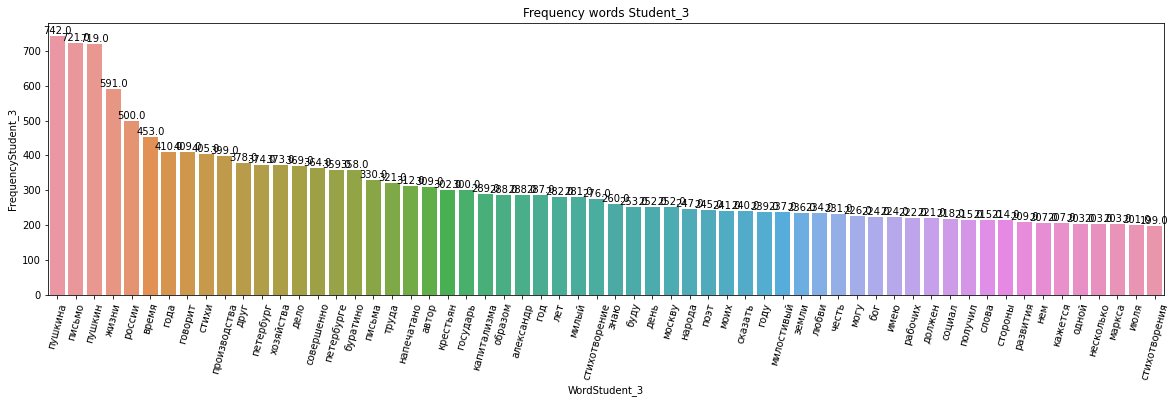

In [52]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_3',y='FrequencyStudent_3',data=df_student_clear2.head(60))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(60)['WordStudent_3'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_3")
#setting the Y-axis labels
ax.set_ylabel("FrequencyStudent_3")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [53]:
from google.colab import files
with pd.ExcelWriter('outputStudents3.xlsx') as writer:  
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_3')
files.download('outputStudents3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
!ls

10.txt	outputStudents3.xlsx  sample_data  stop-words.xlsx  stud.txt


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [ ]:
!rm Analise.xlsx

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Analise.xlsx to Analise (2).xlsx


In [ ]:
df_teach = pd.read_excel("Analise.xlsx", 'teach')
df_teach
#print(df_teach)
print(df_teach.count())

In [ ]:
df_stud = pd.read_excel("Analise.xlsx", 'student_3')
#print(df_stud)
print(df_stud.count())

In [ ]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_3.isin(df_teach.KorpusWordTeach)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_3':'WordSt_3Tch'}, inplace = True)
df_student_ok.rename(columns = {'FrequencyStudent_3':'FrSt_3'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_3Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

In [ ]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusWordTeach.isin(df_stud.WordStudent_3)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusWordTeach':'WordSt_3Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
print(df_teach_ok.sort_values(by ='WordSt_3Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

In [ ]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res

In [ ]:
from google.colab import files
with pd.ExcelWriter('rezult_3.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult_3.xlsx')

In [ ]:
x=res['WordSt_3Tch'].values.tolist()

In [ ]:
res.plot(kind='bar', figsize=(15,8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Frequency Teacher vs Student_3")
plt.xticks(x_pos, x)
plt.show()

# **tf-idf для текстовых данных**

Принцип работы

Term Frequency

**TF**  — это частотность термина, которая измеряет, насколько часто термин встречается в документе. Логично предположить, что в длинных документах термин может встретиться в больших количествах, чем в коротких, поэтому абсолютные числа тут не используем. Поэтому применяют относительные — делят количество раз, когда нужный термин встретился в тексте, на общее количество слов в тексте.

То есть:

TF термина а = (Количество раз, когда термин а встретился в тексте / количество всех слов в тексте)

In [ ]:
map111 = []
map222 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z']

for words in text_lower2:
    if words[0][0] in a_to_m:
        map111.append(words)
    else:
        map222.append(words)

In [ ]:
import collections

def compute_tf(text):
#На вход берем текст в виде списка (list) слов
    #Считаем частотность всех терминов во входном массиве с помощью 
    #метода Counter библиотеки collections
    tf_text = collections.Counter(text)
    for i in tf_text:
        #для каждого слова в tf_text считаем TF путём деления
        #встречаемости слова на общее количество слов в тексте
        tf_text[i] = tf_text[i]/float(len(text))
    #возвращаем объект типа Counter c TF всех слов текста
    return tf_text



In [ ]:
print(compute_tf(map111))
d=compute_tf(map111)
pd.DataFrame(d.items(), columns=['WordsStudent', 'TF-Student'])

Inverse Document Frequency

**IDF** — это обратная частотность документов. Она измеряет непосредственно важность термина. То есть, когда мы считали TF, все термины считаются как бы равными по важности друг другу. Но всем известно, что, например, предлоги встречаются очень часто, хотя практически не влияют на смысл текста. И что с этим поделать? Ответ прост — посчитать IDF. Он считается как логарифм от общего количества документов, делённого на количество документов, в которых встречается термин а.

То есть:

IDF термина а = логарифм(Общее количество документов / Количество документов, в которых встречается термин а)

Логарифм, кстати, можно брать любой — потому что TF-IDF является относительной мерой; то есть веса терминов не выражаются в каких-то единицах, а существуют друг относительно друга. Я, например, обычно беру натуральный или десятичный.

В виде кода это будет выглядеть так:

In [ ]:
def compute_idf(word, corpus):
#на вход берется слово, для которого считаем IDF
#и корпус документов в виде списка списков слов
        #количество документов, где встречается искомый термин
        #считается как генератор списков
        return math.log10(len(corpus)/sum([1.0 for i in corpus if word in i]))